# Spacy

requirements: 
* pip install spacy, pandas, matplotlib
* python -m spacy.en.download

In [2]:
from IPython.display import SVG, display
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

nlp = spacy.load("en_core_web_sm")nlp = spacy.load("en")

In [4]:
text = u"I'm executing this code on an Apple Computer."
document = nlp(text)

In [5]:
document

I'm executing this code on an Apple Computer.

In [6]:
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x11564c7b8>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x1157932e8>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x115793348>)]

In [9]:
### Modifying the Language Model
def identify_starwars(doc):
    for token in doc:
        if token.text == u'starwars':
            token.tag_ = u'NNP'

def return_pipeline(nlp):
    return [nlp.tagger, nlp.parser, nlp.matcher, nlp.entity, identify_starwars]

text = u"I loved all of the starwars movies"
custom_nlp = spacy.load('en_core_web_sm', create_pipeline=return_pipeline)
new_document = custom_nlp(text)

for function in custom_nlp.pipeline:
    print(function)

('tagger', <spacy.pipeline.pipes.Tagger object at 0x11fd47438>)
('parser', <spacy.pipeline.pipes.DependencyParser object at 0x11fd62d08>)
('ner', <spacy.pipeline.pipes.EntityRecognizer object at 0x11fd62d68>)


### Accessing Tokens and Spans

Spans: Sequences of Tokens

In [10]:
import pandas as pd
def info(obj):
    return {'type':type(obj),'__str__': str(obj)}


text = u"""spaCy excels at large-scale information extraction tasks. 
It's written from the ground up in carefully memory-managed Cython. """
document = nlp(text)
token = document[0]
span = document[0:3]


pd.DataFrame(map(info, [token,span,document]))

,type,__str__
0,<class 'spacy.tokens.token.Token'>,spaCy
1,<class 'spacy.tokens.span.Span'>,spaCy excels at
2,<class 'spacy.tokens.doc.Doc'>,spaCy excels at large-scale information extrac...


### Sentence boundary detection

In [17]:
print(document.sents)

In [15]:
for sent in document.sents:
    print(sent)

spaCy excels at large-scale information extraction tasks. 

It's written from the ground up in carefully memory-managed Cython.


### Tokenization

In [21]:
for token in document:
    print(token)

spaCy
excels
at
large
-
scale
information
extraction
tasks
.


It
's
written
from
the
ground
up
in
carefully
memory
-
managed
Cython
.


### Morphological decomposition

In [25]:
token = document[13]
print ("text: %s" % token.text)
print ("suffix: %s" % token.suffix_) 
print ("lemma: %s" % token.lemma_)

text: written
suffix: ten
lemma: write


### Part of Speech Tagging

In [26]:
#Part of speech and Dependency tagging
attrs = map(lambda token: {
                     "token":token
                   , "part of speech":token.pos_
                   , "Dependency" : token.dep_}
                    , document)
pd.DataFrame(attrs)

,token,part of speech,Dependency
0,spaCy,PROPN,compound
1,excels,NOUN,ROOT
2,at,ADP,prep
3,large,ADJ,amod
4,-,PUNCT,punct
5,scale,NOUN,compound
6,information,NOUN,compound
7,extraction,NOUN,compound
8,tasks,NOUN,pobj
9,.,PUNCT,punct


### Noun Chunking

In [28]:
print ("noun chunks: {}".format(list(document.noun_chunks)))

noun chunks: [spaCy excels, large-scale information extraction tasks, It, the ground, carefully memory-managed Cython]


### Named Entity Recognition


In [30]:
ents = [(ent, ent.root.ent_type_) for ent in document.ents]
print ("entities: {}".format(ents))

entities: [(Cython, 'ORG')]


### Text Similarity (Using Word Vectors)

TypeError: object of type 'map' has no len()

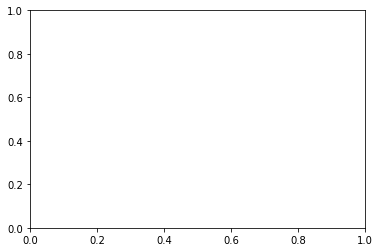

In [32]:
#document, span, and token similarity
def plot_similarities(similarities, target):
    import matplotlib.pyplot as plt
    %matplotlib inline
    f, ax = plt.subplots(1)
    index = range(len(similarities))
    ax.barh(index, similarities)
    ax.set_yticks([i + .5 for i in index])
    ax.set_yticklabels(document2)
    ax.grid()
    ax.set_title("Similarity to '{}'".format(target))
    plt.show()
    
    
computer = nlp(u'computer')
document2 = nlp(u'You might be using a machine running Windows')
similarities = map(lambda token: token.similarity(computer),document2)
plot_similarities(similarities, computer)




    

The Central data repo in spacy is called the **StringStore** it has large set strings containing words, annotations like parts of speach. If we look inside it we will find the numbers for attributes, the numbers are the index id's for the correct string values located in the stirng store 

In [36]:
document = nlp(text)
token = document[0]
print(token.pos, token.pos_)

96 PROPN


Note that within the token there is `pos` attribute and `pos_` attribute, the `pos` is just an intiger that represents the value located in the StringStore. `pos_` is actually a method that grabs the element form the index `pos` from the stringstore 

In [39]:
pos_index = token.pos
StringStore = token.vocab.strings

value = StringStore[pos_index]
print(value)

PROPN


In [40]:
print(len(StringStore))

1201


In [41]:
new_doc = nlp("Adding a string to String Store")

In [43]:
UpdateStringStore = new_doc.vocab.strings
print(len(UpdateStringStore))

1209


## Reference
[Aaron Kramer](https://learning.oreilly.com/videos/introduction-to-natural/9781491986066/)